In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
import time

In [2]:
df = pd.read_csv("/Users/ohno/study/data/price.csv")
df = df.drop(columns=['Unnamed: 0'])
df[4400:4450]

,Date,Open,High,Low,Close,MACD,Signal,RSI,SMA5,SMA25,Label
4400,2018/12/26,19302.59,19530.35,18948.58,19327.06,-579.718005,-295.393959,23.491299,20005.898,21392.6336,1
4401,2018/12/27,19706.19,20211.57,19701.76,20077.62,-578.076951,-342.630531,36.366213,19823.838,21332.4136,1
4402,2018/12/28,19957.88,20084.38,19900.04,20014.77,-575.217129,-387.789599,33.713056,19748.276,21272.7028,0
4403,2019/1/4,19655.13,19692.58,19241.37,19561.96,-602.542943,-435.990304,33.755150,19627.430,21189.3192,0
4404,2019/1/7,19944.61,20266.22,19920.80,20038.97,-579.033390,-478.327288,39.931037,19804.076,21118.3980,1
4405,2019/1/8,20224.67,20347.92,20106.36,20204.04,-540.847576,-512.994238,36.596258,19979.472,21048.4636,1
4406,2019/1/9,20366.30,20494.35,20331.20,20427.06,-486.975641,-534.003250,36.712459,20049.360,20978.4652,1
4407,2019/1/10,20270.88,20345.92,20101.93,20163.80,-460.219502,-544.398978,38.007443,20079.166,20894.5132,0
4408,2019/1/11,20296.45,20389.89,20294.74,20359.70,-418.384699,-535.668426,38.781601,20238.714,20814.8588,1
4409,2019/1/15,20264.82,20571.28,20204.43,20555.29,-365.237605,-511.837271,44.303960,20341.978,20734.0800,1


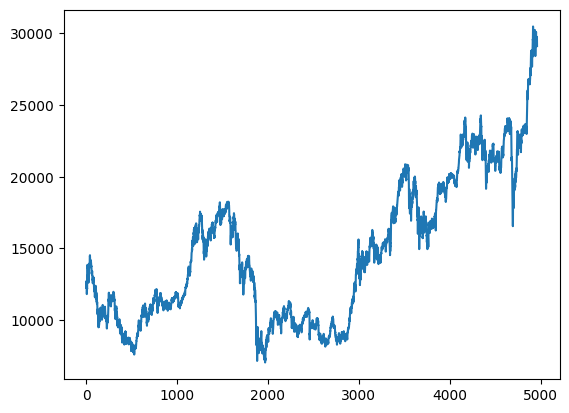

In [3]:
plt.plot(df.loc[:, 'Close'])

In [4]:
df1 = pd.read_csv("/Users/ohno/study/data/price.csv", index_col='Date', parse_dates=True)
datename = df1.index.strftime('%Y-%m-%d')
for i in range(3):
    print(f'{str(datename[i])}~{str(datename[i+60-1])}')
print(df[df['Date'] == '2019/1/4'])

2001-03-02~2001-05-30
2001-03-05~2001-05-31
2001-03-06~2001-06-01
          Date      Open      High       Low     Close        MACD   
4403  2019/1/4  19655.13  19692.58  19241.37  19561.96 -602.542943  \

          Signal       RSI      SMA5       SMA25  Label  
4403 -435.990304  33.75515  19627.43  21189.3192      0  


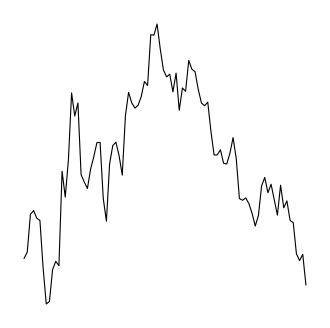

In [13]:
figsize_px = np.array([400, 400])
dpi = 100
figsize_inch = figsize_px / dpi

date_span = 90

fig, ax = plt.subplots(figsize=figsize_inch, dpi=dpi)
ax.axis('off')
ax.plot(df.loc[:date_span-1, 'Close'], color = 'black', linewidth=0.8)
plt.show()

4871


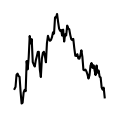

In [5]:
num_data = df.shape[0]
date_span = 90
# train_len = 4099   #2017/12/29まで
# val_len = 4344     #2018/12/28まで
train_len = 4230    #2018-04-19まで
val_len = 4475      #2019-04-19まで
print(num_data-date_span)

figsize_px = np.array([128, 128])
dpi = 100
figsize_inch = figsize_px / dpi

count = 0

dirname = '/Users/ohno/study/images/Close/90days/'
train_dirname = '/Users/ohno/study/images/Close/90days/train/'
val_dirname = '/Users/ohno/study/images/Close/90days/val/'

for i in range(num_data - date_span):
    fig, ax = plt.subplots(figsize=figsize_inch, dpi=dpi)
    ax.axis('off')
    ax.plot(df.loc[i:i+date_span-1, 'Close'], color = 'black')
    if i < train_len:
        if df.loc[i+date_span, 'Label'] == 0:
            if not(os.path.exists(train_dirname + 'down/')):
                os.makedirs(train_dirname + 'down/')
            plt.savefig(train_dirname + 'down/' + f'{str(datename[i])}~{str(datename[i+date_span-1])}.png')
        else:
            if not(os.path.exists(train_dirname + 'up/')):
                os.makedirs(train_dirname + 'up/')
            plt.savefig(train_dirname + 'up/' + f'{str(datename[i])}~{str(datename[i+date_span-1])}.png')
    elif train_len <= i < val_len:
        if df.loc[i+date_span, 'Label'] == 0:
            if not(os.path.exists(val_dirname + 'down/')):
                os.makedirs(val_dirname + 'down/')
            plt.savefig(val_dirname + 'down/' + f'{str(datename[i])}~{str(datename[i+date_span-1])}.png')
        else:
            if not(os.path.exists(val_dirname + 'up/')):
                os.makedirs(val_dirname + 'up/')
            plt.savefig(val_dirname + 'up/' + f'{str(datename[i])}~{str(datename[i+date_span-1])}.png')    
    if i == 0:
        plt.show()
    plt.clf()
    plt.close()

# for i in range(num_data - date_span):
#     fig, ax1 = plt.subplots(figsize=figsize_inch, dpi=dpi)
#     ax2 = ax1.twinx()
#     ax1.axis('off')
#     ax2.axis('off')
#     ax1.plot(df.loc[i:i+date_span-1, 'Close'], color = 'black')
#     ax2.plot(df.loc[i:i+date_span-1, 'RSI'], color = 'red')
#     if i < train_len:
#         if df.loc[i+date_span, 'Label'] == 0:
#             if not(os.path.exists(train_dirname + 'down/')):
#                 os.makedirs(train_dirname + 'down/')
#             plt.savefig(train_dirname + 'down/' + f'{str(datename[i])}~{str(datename[i+date_span-1])}.png')
#         else:
#             if not(os.path.exists(train_dirname + 'up/')):
#                 os.makedirs(train_dirname + 'up/')
#             plt.savefig(train_dirname + 'up/' + f'{str(datename[i])}~{str(datename[i+date_span-1])}.png')
#     elif i >= train_len:
#         if df.loc[i+date_span, 'Label'] == 0:
#             if not(os.path.exists(val_dirname + 'down/')):
#                 os.makedirs(val_dirname + 'down/')
#             plt.savefig(val_dirname + 'down/' + f'{str(datename[i])}~{str(datename[i+date_span-1])}.png')
#         else:
#             if not(os.path.exists(val_dirname + 'up/')):
#                 os.makedirs(val_dirname + 'up/')
#             plt.savefig(val_dirname + 'up/' + f'{str(datename[i])}~{str(datename[i+date_span-1])}.png')    
#     if i == 0:
#         plt.show()
#     plt.clf()
#     plt.close()